In [1]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

In [1]:
import pandas as pd
from pathlib import Path
import os
import random
import numpy as np
import glob

metadata_path = Path(os.environ.get('BUILDINGS_BENCH', ''), 'metadata_dev')

In [2]:
short_files = np.array(os.listdir(metadata_path / "AttributeCaps" / "short"))
medium_files = np.array(os.listdir(metadata_path / "AttributeCaps" / "medium"))
long_files = np.array(os.listdir(metadata_path / "AttributeCaps" / "long"))

In [7]:
files = short_files[np.isin(short_files, medium_files)]

In [8]:
files = files[np.isin(files, long_files)]

In [9]:
# files = np.random.choice(files, size=5000, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [11]:
len(files)

4989

In [12]:
lengths = {
    "short": [],
    "medium": [],
    "long": []
}

for f in files:
    for l in ["short", "medium", "long"]:
        path = metadata_path / "AttributeCaps" / l / f
        with open(path, "r") as f_:
            text = f_.read()
        # tokens = tokenizer(text, return_tensors='pt') 
        # lengths[l].append(tokens["input_ids"].size(1))
        lengths[l].append(len(text))

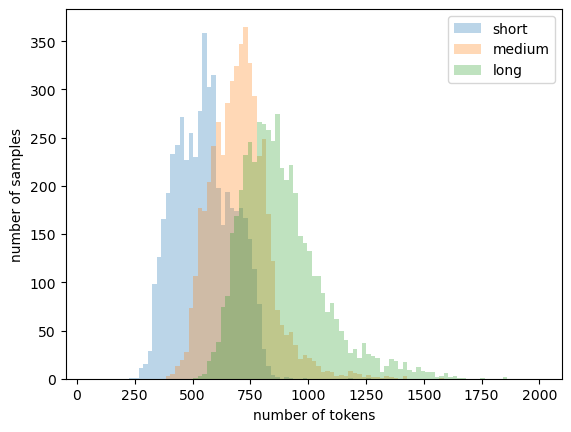

In [13]:
import matplotlib.pyplot as plt

bins = np.linspace(50, 2000, 100)

plt.hist(lengths["short"], bins=bins, alpha=0.3, label="short")
plt.hist(lengths["medium"], bins=bins, alpha=0.3, label="medium")
plt.hist(lengths["long"], bins=bins, alpha=0.3, label="long")
plt.legend()
plt.xlabel("number of tokens")
plt.ylabel("number of samples")
plt.show()